In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5053,00026825_017.png,No Finding,17,26825,037Y,F,PA,2021,2020,0.194311,0.194311
5259,00028223_000.png,No Finding,0,28223,035Y,F,PA,2544,3056,0.139000,0.139000
3881,00019124_096.png,Nodule|Pneumothorax,96,19124,051Y,F,PA,2992,2991,0.143000,0.143000


In [3]:
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


## EDA

### Patient Gender Distribution

In [5]:
print(len(all_xray_df['Patient Gender'].unique()))

2


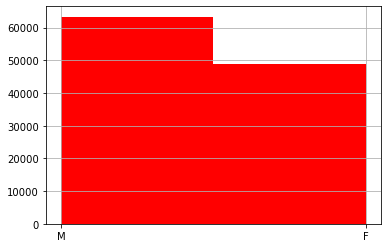

In [6]:
all_xray_df['Patient Gender'].hist(bins=2, color='red')
plt.show()

### Patient Age Distribution

In [7]:
print(len(all_xray_df['Patient Age'].unique()))

107


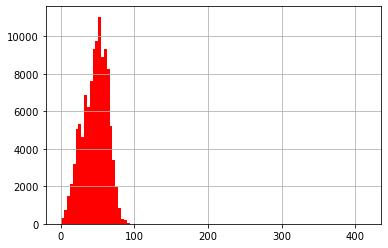

In [8]:
all_xray_df['Patient Age'].hist(bins=107, color='red')
plt.show()

### Patient Position Distribution

In [9]:
print(len(all_xray_df['View Position'].unique()))

2


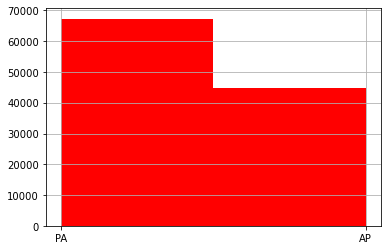

In [10]:
all_xray_df['View Position'].hist(bins=2, color='red')
plt.show()

### Number of Diseases Per Patient

In [11]:
cnts_per_patient = all_xray_df.groupby(['Patient ID'])['Patient ID'].count()

In [12]:
cnts_per_patient

Patient ID
1        3
2        1
3        8
4        1
5        8
        ..
30801    2
30802    1
30803    1
30804    1
30805    1
Name: Patient ID, Length: 30805, dtype: int64

Text(0.5, 1.0, 'Frequency vs. Number of Diseases Per Patient')

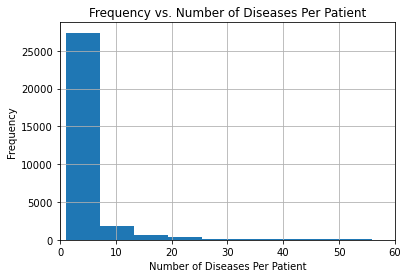

In [13]:
cnts_per_patient.hist(bins=30)
plt.xlim(0,60)
plt.xlabel('Number of Diseases Per Patient')
plt.ylabel('Frequency')
plt.title('Frequency vs. Number of Diseases Per Patient')

In [14]:
print(all_xray_df['Finding Labels'].unique())

['Cardiomegaly' 'Cardiomegaly|Emphysema' 'Cardiomegaly|Effusion'
 'No Finding' 'Hernia' 'Hernia|Infiltration' 'Mass|Nodule' 'Infiltration'
 'Effusion|Infiltration' 'Nodule' 'Emphysema' 'Effusion' 'Atelectasis'
 'Effusion|Mass' 'Emphysema|Pneumothorax' 'Pleural_Thickening'
 'Effusion|Emphysema|Infiltration|Pneumothorax'
 'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax'
 'Effusion|Pneumonia|Pneumothorax' 'Pneumothorax'
 'Effusion|Infiltration|Pneumothorax' 'Infiltration|Mass'
 'Infiltration|Mass|Pneumothorax' 'Mass'
 'Cardiomegaly|Infiltration|Mass|Nodule'
 'Cardiomegaly|Effusion|Emphysema|Mass'
 'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax' 'Emphysema|Mass'
 'Emphysema|Mass|Pneumothorax' 'Atelectasis|Pneumothorax'
 'Cardiomegaly|Emphysema|Pneumothorax' 'Mass|Pleural_Thickening'
 'Cardiomegaly|Mass|Pleural_Thickening' 'Effusion|Infiltration|Nodule'
 'Atelectasis|Effusion|Pleural_Thickening' 'Fibrosis|Infiltration'
 'Fibrosis|Infiltration|Pleural_Thickening' 'Fibrosis'
 '

### Distribution of Pneumonia and Non-Pneumonia Diseases

In [15]:
lst = []
for idx in range(len(all_xray_df)):
    row = all_xray_df.iloc[idx,:]
    comorbid_pneumonia = row['Finding Labels'].split('|')
    if 'Pneumonia' in comorbid_pneumonia:
        lst.append('Pneumonia')
    else:
        lst.append('Non-Pneumonia')

Text(0, 0.5, 'No. Occurences')

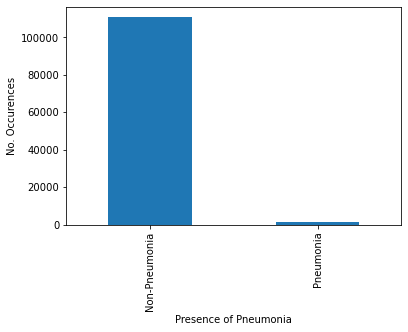

In [16]:
pd.Series(lst).value_counts().plot(kind='bar')
plt.xlabel('Presence of Pneumonia')
plt.ylabel('No. Occurences')

In [17]:
print('Pneumonia Cases:', lst.count('Pneumonia'))

Pneumonia Cases: 1431


In [18]:
print('Non-Pneumonia Cases:', lst.count('Non-Pneumonia'))

Non-Pneumonia Cases: 110689


### Distribution of Diseases Comorbid with Pneumonia

In [19]:
lst = []
for idx in range(len(all_xray_df)):
    row = all_xray_df.iloc[idx,:]
    comorbid_pneumonia = row['Finding Labels'].split('|')
    if 'Pneumonia' in comorbid_pneumonia:
        lst.extend(comorbid_pneumonia)
lst = list(filter(lambda x: x != 'Pneumonia', lst))

In [20]:
print(lst)

['Effusion', 'Pneumothorax', 'Atelectasis', 'Consolidation', 'Edema', 'Nodule', 'Edema', 'Effusion', 'Infiltration', 'Pleural_Thickening', 'Atelectasis', 'Infiltration', 'Cardiomegaly', 'Edema', 'Effusion', 'Infiltration', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Infiltration', 'Infiltration', 'Fibrosis', 'Infiltration', 'Nodule', 'Edema', 'Infiltration', 'Cardiomegaly', 'Infiltration', 'Nodule', 'Infiltration', 'Pneumothorax', 'Edema', 'Effusion', 'Edema', 'Effusion', 'Infiltration', 'Edema', 'Effusion', 'Fibrosis', 'Infiltration', 'Atelectasis', 'Infiltration', 'Effusion', 'Infiltration', 'Pleural_Thickening', 'Atelectasis', 'Fibrosis', 'Pleural_Thickening', 'Edema', 'Effusion', 'Nodule', 'Edema', 'Effusion', 'Nodule', 'Effusion', 'Edema', 'Effusion', 'Edema', 'Effusion', 'Nodule', 'Atelectasis', 'Effusion', 'Infiltration', 'Atelectasis', 'Emphysema', 'Infiltration', 'Edema', 'Effusion', 'Infiltration', 'Atelectasis', 'Infiltration', 'Atelectasis', 'Atelectasis', 'Atelectasis', '

Text(0, 0.5, 'No. Occurences')

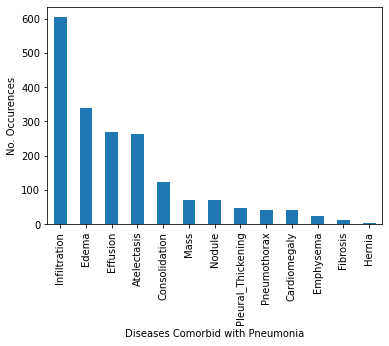

In [21]:
pd.Series(lst).value_counts().plot(kind='bar')
plt.xlabel('Diseases Comorbid with Pneumonia')
plt.ylabel('No. Occurences')

From the bar chart above, we observe that the most frequently occuring disease comorbid with Pneumonia is Infiltration, followed by Edema.